In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import os
import pickle
import matplotlib.pyplot as plt
gpus = tf.config.experimental.list_physical_devices('GPU')

In [2]:
def load_cifar10_data(path):
    # CIFAR-10 数据集保存为多个pickled文件
    with open(path, 'rb') as file:
        data = pickle.load(file, encoding='bytes')
    return data

# 加载CIFAR-10数据
def load_cifar10():
    # CIFAR-10包含多个批次，这里加载训练集
    train_data = []
    train_labels = []

    # 假设数据文件已经解压
    for batch in range(1, 6):
        batch_file = f'./cifar-10-batches-py/data_batch_{batch}'
        batch_data = load_cifar10_data(batch_file)
        train_data.append(batch_data[b'data'])
        train_labels.append(batch_data[b'labels'])
    
    # 合并所有批次
    train_data = np.vstack(train_data)
    train_labels = np.hstack(train_labels)
    
    # 加载测试集
    test_batch = load_cifar10_data('./cifar-10-batches-py/test_batch')
    test_data = test_batch[b'data']
    test_labels = np.array(test_batch[b'labels'])

    return train_data, train_labels, test_data, test_labels

In [3]:
train_data, train_labels, test_data, test_labels = load_cifar10()

In [4]:
# CIFAR-10数据集为原始像素值，形状为 (N, 3072) 每个样本为一个1D数组，RGB值连接为一维
# 重塑数据到 32x32x3 图像格式
train_data = train_data.reshape(-1, 32, 32, 3).astype('float32')
test_data = test_data.reshape(-1, 32, 32, 3).astype('float32')

# 标准化数据到 [0, 1] 范围
train_data /= 255.0
test_data /= 255.0

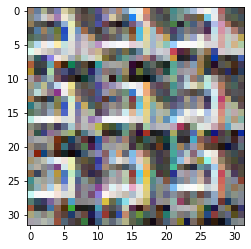

In [5]:
plt.imshow(train_data[1])

In [6]:
# 构建卷积神经网络模型
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10个类别
])

# 编译模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # 适用于整数标签
              metrics=['accuracy'])

# 打印模型概况
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [7]:
# 训练模型，确保数据在GPU上
with tf.device('/GPU:0'):  # 如果有多个GPU，选择一个GPU进行训练
    history = model.fit(train_data, train_labels, epochs=10, batch_size=64, validation_data=(test_data, test_labels))
# 评估模型
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f"Test accuracy: {test_acc}")

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
782/782 [==============================] - ETA: 0s - loss: 1.6804 - accuracy: 0.3908WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001D79C3A90D0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`

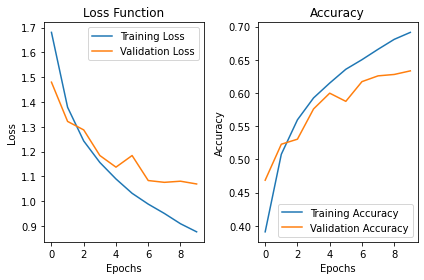

313/313 [==============================] - 0s 983us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Test accuracy: 0.0


In [13]:
# 损失函数曲线
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Function')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 准确率曲线
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 评估模型并输出准确率
test_loss, test_acc = model.evaluate(test_data)
print(f"Test accuracy: {test_acc}")

In [8]:
# 使用训练好的模型进行预测
predictions = model.predict(test_data)

# 获取预测结果的类别
predicted_classes = np.argmax(predictions, axis=-1)



Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [9]:
print(predicted_classes,predictions)

[3 8 8 ... 5 4 7] [[3.21329609e-02 2.11733505e-02 8.46046582e-02 ... 1.03068855e-02
  1.11988015e-01 1.48779929e-01]
 [8.13274980e-02 1.77099586e-01 7.30769185e-04 ... 1.41092192e-03
  6.99737132e-01 3.82589139e-02]
 [6.98099956e-02 4.79899012e-02 4.59090516e-04 ... 9.37858887e-04
  8.47845137e-01 1.52674057e-02]
 ...
 [1.78057491e-03 3.85490603e-05 1.44893602e-01 ... 6.93987682e-03
  7.98225461e-04 9.15293989e-04]
 [3.76622044e-02 4.28213924e-02 7.68949017e-02 ... 1.14712492e-01
  2.48201308e-03 1.91730913e-03]
 [6.22392748e-04 1.68192728e-05 3.83332628e-03 ... 9.10348535e-01
  1.03694274e-05 6.02836546e-04]]


In [10]:
# 输出某个样本的预测类别（分类标签）
print(f"Predicted class label for the first image: {predicted_classes[0]}")

Predicted class label for the first image: 3


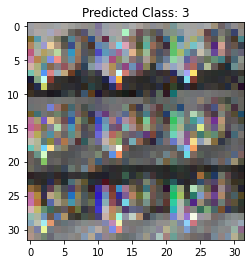

In [11]:
# 显示某个样本的预测结果

plt.imshow(test_data[0])
plt.title(f"Predicted Class: {predicted_classes[0]}")
plt.show()